<a href="https://colab.research.google.com/github/vilacco/roc_auc/blob/main/roc_auc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [ ]:
X, Y = make_classification(n_samples=15,n_features=5,class_sep=0.2,weights=[0.6],random_state=42)
df = pd.DataFrame(X)
df['y_true'] = Y
lr = LogisticRegression()

In [ ]:
lr.fit(df[[0,1,2,3,4]], df['y_true'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.predict(df[[0,1,2,3,4]])

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
df['y_score'] = lr.predict_proba(df[[0,1,2,3,4]])[:,1]

In [ ]:
df['y_pred'] = (df['y_score']>0.5)*1

In [ ]:
 def get_confusion_matrix(row):
    if row['y_true'] == 1 and row['y_pred'] == 1:
        return 'TP'
    if row['y_true'] == 0 and row['y_pred'] == 1:
        return 'FP'
    if row['y_true'] == 1 and row['y_pred'] == 0:
        return 'FN'
    if row['y_true'] == 0 and row['y_pred'] == 0:
        return 'TN'

In [ ]:
df['C_M_V'] = df.apply(get_confusion_matrix, axis = 1)

In [ ]:
df

,0,1,2,3,4,y_true,y_score,y_pred,C_M_V
0,-0.330756,0.456232,0.586056,0.361547,1.057122,1,0.722093,1,TP
1,-0.136681,-0.550740,-0.381580,0.004655,0.931280,1,0.502817,1,TP
2,-1.394857,1.677553,2.263554,1.476453,-1.763040,1,0.700653,1,TP
3,-0.292217,-1.112643,-0.761113,0.022643,-0.301104,0,0.253159,0,TN
4,-0.011965,-0.213767,-0.173091,-0.032009,1.031000,1,0.531244,1,TP
5,-0.149040,-0.783119,-0.570134,-0.030673,-0.460639,0,0.231577,0,TN
6,-0.396427,-0.198236,0.073780,0.287451,-0.719844,0,0.323831,0,TN
7,-0.258120,0.087540,0.230807,0.229577,-0.115648,0,0.431663,0,TN
8,-0.360848,-0.620500,-0.304138,0.175490,-0.839218,1,0.245193,0,FN
9,-0.169714,-0.109288,0.010981,0.118279,-1.478522,0,0.171740,0,TN


In [ ]:
df['C_M_V'].value_counts()

TN    8
TP    5
FN    1
FP    1
Name: C_M_V, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['y_true'], df['y_pred'])

array([[8, 1],
       [1, 5]])

In [ ]:
thrs = np.sort(df['y_score'].unique())

In [ ]:
thrs

array([0.17174035, 0.18482864, 0.21028964, 0.23157701, 0.24519295,
       0.25315883, 0.27263169, 0.32383082, 0.43166254, 0.50281701,
       0.53124444, 0.56984163, 0.6484592 , 0.70065318, 0.7220926 ])

In [ ]:
cm_for_thresholds = pd.DataFrame({'thrs': thrs})

In [ ]:
cm_for_thresholds['y_true'] = df['y_true']

In [ ]:
cm_for_thresholds['y_pred'] = (df['y_score'] >  cm_for_thresholds['thrs']) * 1  
cm_for_thresholds['C_M_V'] = cm_for_thresholds.apply(get_confusion_matrix, axis = 1)
cm_for_thresholds['C_M_V'].value_counts()

TN    6
TP    4
FP    3
FN    2
Name: C_M_V, dtype: int64

In [ ]:
cm_for_thresholds

,thrs,y_true,y_pred,C_M_V
0,0.171740,1,1,TP
1,0.184829,1,1,TP
2,0.210290,1,1,TP
3,0.231577,0,1,FP
4,0.245193,1,1,TP
5,0.253159,0,0,TN
6,0.272632,0,1,FP
7,0.323831,0,1,FP
8,0.431663,1,0,FN
9,0.502817,0,0,TN


In [ ]:
thr = thrs[0]
result=[]
for thr in thrs:
    cm_for_thresholds['y_pred'] = (df['y_score'] >  thr) * 1  
    tp = len(cm_for_thresholds[(cm_for_thresholds['y_true']==1)&(cm_for_thresholds['y_pred']== 1)])
    tn = len(cm_for_thresholds[(cm_for_thresholds['y_true']==0)&(cm_for_thresholds['y_pred']== 0)])
    fp = len(cm_for_thresholds[(cm_for_thresholds['y_true']==0)&(cm_for_thresholds['y_pred']== 1)])
    fn = len(cm_for_thresholds[(cm_for_thresholds['y_true']==1)&(cm_for_thresholds['y_pred']== 0)])
    result.append((tp,tn,fp,fn,thr))

In [ ]:
confusion_matrix = pd.DataFrame(result)
confusion_matrix.columns = ['tp','tn','fp','fn','thr']
confusion_matrix['true_positive_rate'] = confusion_matrix['tp'] / (confusion_matrix['tp'] + confusion_matrix['fn'])
confusion_matrix['false_positive_rate'] = confusion_matrix['fp'] / (confusion_matrix['fp'] + confusion_matrix['tn'])

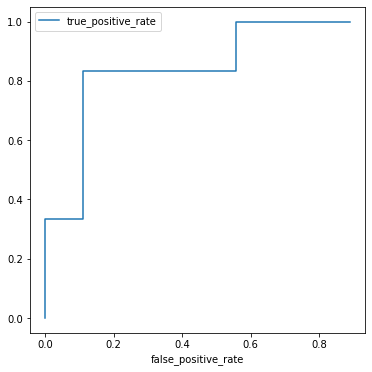

In [ ]:
confusion_matrix.plot(x = 'false_positive_rate', y = 'true_positive_rate',figsize = (6,6)) 

In [ ]:
0.431

0.431

In [ ]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(df['y_true'], df['y_score'])

0.8518518518518519